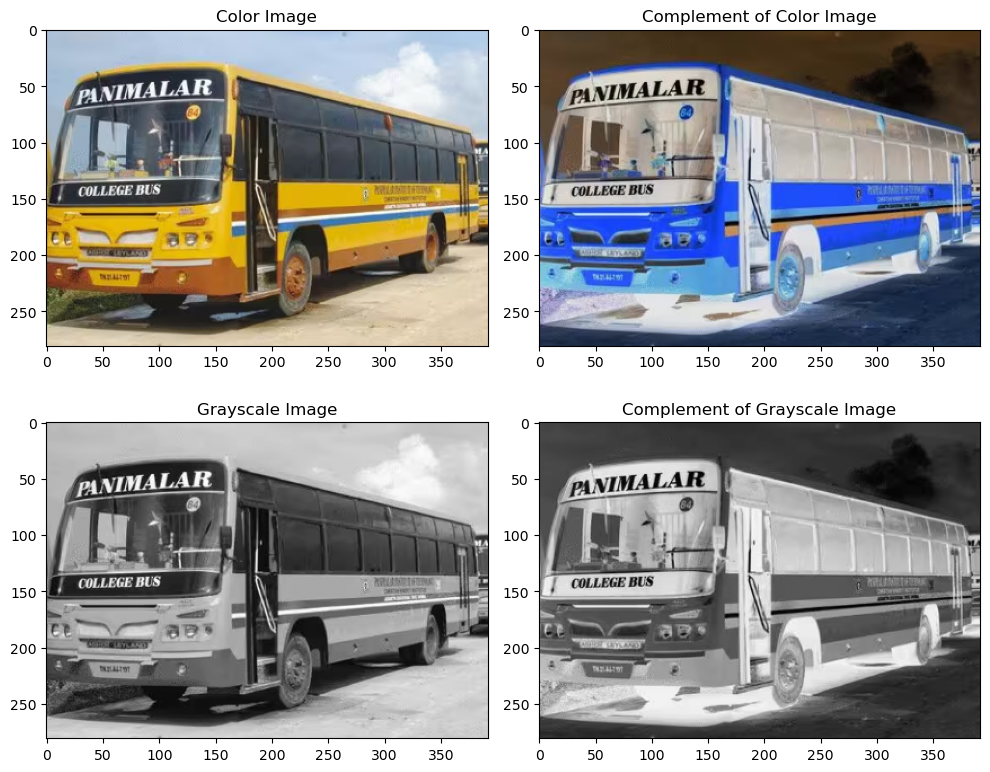

In [2]:
import cv2
import matplotlib.pyplot as plt

# Read image
img = cv2.imread('input4.png')  # <-- rename image exactly like this

if img is None:
    print("ERROR: Image not found. Check filename or path.")
    exit()

# Convert BGR to RGB
color_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Complement of color image
color_complement = 255 - color_img

# Convert to grayscale
gray_img = cv2.cvtColor(color_img, cv2.COLOR_RGB2GRAY)

# Complement of grayscale image
gray_complement = 255 - gray_img

# Display results
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.title("Color Image")
plt.imshow(color_img)
plt.axis('on')


plt.subplot(2, 2, 2)
plt.title("Complement of Color Image")
plt.imshow(color_complement)
plt.axis('on')


plt.subplot(2, 2, 3)
plt.title("Grayscale Image")
plt.imshow(gray_img, cmap='gray')
plt.axis('on')


plt.subplot(2, 2, 4)
plt.title("Complement of Grayscale Image")
plt.imshow(gray_complement, cmap='gray')
plt.axis('on')


plt.tight_layout()
plt.show()


Reference Pixel: (100, 100)
4-Neighbourhood: [(101, 100), (99, 100), (100, 101), (100, 99)]
8-Neighbourhood: [(101, 100), (99, 100), (100, 101), (100, 99), (101, 101), (101, 99), (99, 101), (99, 99)]
D-Neighbourhood: [(101, 101), (101, 99), (99, 101), (99, 99)]

4-Connected Pixels: [(101, 100), (99, 100), (100, 101), (100, 99)]
8-Connected Pixels: [(101, 100), (99, 100), (100, 101), (100, 99), (101, 101), (101, 99), (99, 99)]

Distance Measures
City Block Distance: 12
Euclidean Distance: 8.602325267042627
Chessboard Distance: 7


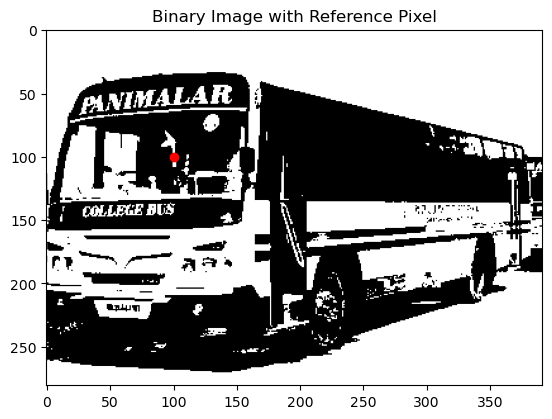

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read uploaded image
img = cv2.imread('input4.png')

if img is None:
    print("ERROR: Image not found")
    exit()

# Step 2: Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 3: Convert to binary image
_, binary = cv2.threshold(gray, 127, 1, cv2.THRESH_BINARY)

# Step 4: Select reference pixel (row, column)
x, y = 100, 100   # change if needed

# Step 5: Define neighbourhoods
N4 = [(x+1,y), (x-1,y), (x,y+1), (x,y-1)]
N8 = N4 + [(x+1,y+1), (x+1,y-1), (x-1,y+1), (x-1,y-1)]
ND = [(x+1,y+1), (x+1,y-1), (x-1,y+1), (x-1,y-1)]

# Step 6: Connectivity (same pixel value)
pixel_value = binary[x, y]

connected_4 = [p for p in N4 if binary[p] == pixel_value]
connected_8 = [p for p in N8 if binary[p] == pixel_value]

# Step 7: Distance measures
p = (x, y)
q = (x+5, y+7)

city_block = abs(p[0]-q[0]) + abs(p[1]-q[1])
euclidean = ((p[0]-q[0])**2 + (p[1]-q[1])**2) ** 0.5
chessboard = max(abs(p[0]-q[0]), abs(p[1]-q[1]))

# Step 8: Display results
print("Reference Pixel:", p)
print("4-Neighbourhood:", N4)
print("8-Neighbourhood:", N8)
print("D-Neighbourhood:", ND)

print("\n4-Connected Pixels:", connected_4)
print("8-Connected Pixels:", connected_8)

print("\nDistance Measures")
print("City Block Distance:", city_block)
print("Euclidean Distance:", euclidean)
print("Chessboard Distance:", chessboard)

# Display image with reference pixel
plt.imshow(binary, cmap='gray')
plt.scatter(y, x, c='red')
plt.title("Binary Image with Reference Pixel")
plt.axis('on')
plt.show()



Reference Pixel: (200, 200)

4-Neighbors: [(199, 200), (201, 200), (200, 199), (200, 201)]
Diagonal Neighbors: [(199, 199), (199, 201), (201, 199), (201, 201)]
8-Neighbors: [(199, 199), (199, 200), (199, 201), (200, 199), (200, 201), (201, 199), (201, 200), (201, 201)]

Connectivity (Binary Value = 255):
(199, 199) is Not Connected
(199, 200) is Not Connected
(199, 201) is Not Connected
(200, 199) is Not Connected
(200, 201) is Not Connected
(201, 199) is Not Connected
(201, 200) is Not Connected
(201, 201) is Not Connected

Distance Measures:

Neighbor: (199, 199)
Euclidean Distance: 1.4142135623730951
City-Block Distance: 2
Chessboard Distance: 1

Neighbor: (199, 200)
Euclidean Distance: 1.0
City-Block Distance: 1
Chessboard Distance: 1

Neighbor: (199, 201)
Euclidean Distance: 1.4142135623730951
City-Block Distance: 2
Chessboard Distance: 1

Neighbor: (200, 199)
Euclidean Distance: 1.0
City-Block Distance: 1
Chessboard Distance: 1

Neighbor: (200, 201)
Euclidean Distance: 1.0
City-

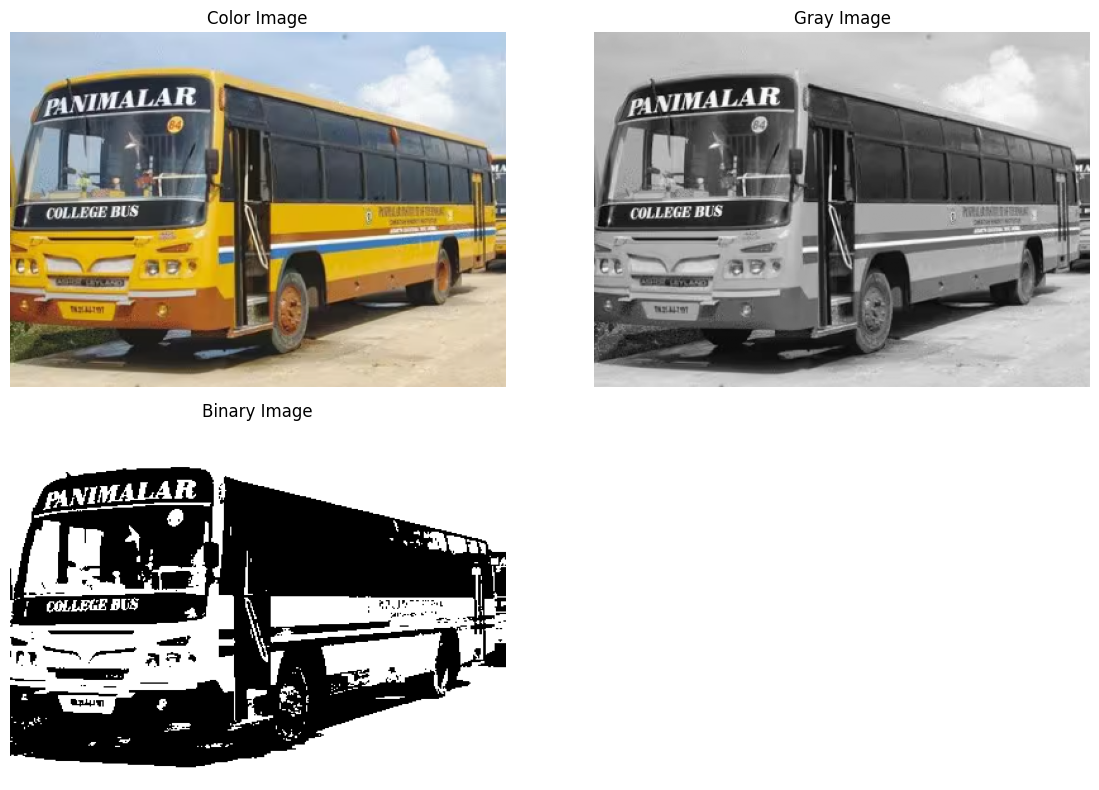

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

# -----------------------------
# 1. Read the image
# -----------------------------
img = cv2.imread('input4.png')

if img is None:
    print("Image not found. Make sure input4.png is in the same folder.")
    exit()

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Convert to binary image
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# -----------------------------
# 2. Select reference pixel
# -----------------------------
x, y = 200, 200   # You can change this

print(f"\nReference Pixel: ({x}, {y})")

rows, cols = binary.shape

# -----------------------------
# 3. Find Neighbors
# -----------------------------
def get_4_neighbors(x, y):
    neighbors = []
    directions = [(-1,0),(1,0),(0,-1),(0,1)]
    for dx, dy in directions:
        nx, ny = x+dx, y+dy
        if 0 <= nx < rows and 0 <= ny < cols:
            neighbors.append((nx, ny))
    return neighbors

def get_diagonal_neighbors(x, y):
    neighbors = []
    directions = [(-1,-1),(-1,1),(1,-1),(1,1)]
    for dx, dy in directions:
        nx, ny = x+dx, y+dy
        if 0 <= nx < rows and 0 <= ny < cols:
            neighbors.append((nx, ny))
    return neighbors

def get_8_neighbors(x, y):
    neighbors = []
    for dx in [-1,0,1]:
        for dy in [-1,0,1]:
            if dx == 0 and dy == 0:
                continue
            nx, ny = x+dx, y+dy
            if 0 <= nx < rows and 0 <= ny < cols:
                neighbors.append((nx, ny))
    return neighbors

n4 = get_4_neighbors(x, y)
nd = get_diagonal_neighbors(x, y)
n8 = get_8_neighbors(x, y)

print("\n4-Neighbors:", n4)
print("Diagonal Neighbors:", nd)
print("8-Neighbors:", n8)

# -----------------------------
# 4. Connectivity Check
# -----------------------------
print("\nConnectivity (Binary Value = 255):")

for neighbor in n8:
    nx, ny = neighbor
    if binary[nx, ny] == 255:
        print(f"{neighbor} is Connected")
    else:
        print(f"{neighbor} is Not Connected")

# -----------------------------
# 5. Distance Measures
# -----------------------------
print("\nDistance Measures:")

for neighbor in n8:
    nx, ny = neighbor
    
    euclidean = math.sqrt((nx-x)**2 + (ny-y)**2)
    cityblock = abs(nx-x) + abs(ny-y)
    chessboard = max(abs(nx-x), abs(ny-y))
    
    print(f"\nNeighbor: {neighbor}")
    print("Euclidean Distance:", euclidean)
    print("City-Block Distance:", cityblock)
    print("Chessboard Distance:", chessboard)

# -----------------------------
# 6. Display Images
# -----------------------------
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(img_rgb)
plt.title("Color Image")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(gray, cmap='gray')
plt.title("Gray Image")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(binary, cmap='gray')
plt.title("Binary Image")
plt.axis("off")

plt.tight_layout()
plt.show()
